## Observations and Insights 

* Overall, more treatments were performed with Capomulin and Ramicane drug regimen.  Presumably, this is because some mice on other regimen did not survive through all testing timepoints.

* Mouse 'm601' was treated with Capomulin. Tumor volume reduced steadily, from 45mm3 at timepoint 0 to 30mm3 at timepoint 45.  There was a slight increase at timepoint 40 but overall data indicates treatment of this mouse was successful.

* Variance, Standard Deviation and SEM were highest with Ketapril and Naftisol drug regimen.

* 10 of 24 mice had died prior to testing timepoint 15 with Propriva drug regimen.

In [68]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import csv

from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [69]:
# Checking the number of mice.
mouse_list = mouse_df["Mouse ID"]
print(f'There are {len(mouse_list.unique())} unique "Mouse IDs".')
mouse_list.value_counts()


There are 249 unique "Mouse IDs".


g989    13
k483    10
l725    10
a203    10
t724    10
        ..
v199     1
l872     1
d133     1
t573     1
h428     1
Name: Mouse ID, Length: 249, dtype: int64

In [70]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Add 'Duplicate_Check' column to mouse_df.  True = duplicated on 'Mouse ID' and 'Timepoint'.
mouse_df['Duplicate_Check'] = mouse_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)

# Create a df of duplicates ('duplicate_df')
duplicates = mouse_df['Duplicate_Check'].isin([True])
duplicate_mice_df = mouse_df[duplicates]

# Create a list of duplicates and print to preview
list_of_duplicate_mice = duplicate_mice_df["Mouse ID"].unique()
print(f'List of duplicate mice: {list_of_duplicate_mice}')

# Store the "mouse_ID" of the duplicate in a variable
mouse_to_be_removed = list_of_duplicate_mice[0]
print(f'"{mouse_to_be_removed}" is the only mouse with duplicate results. This mouse is to be removed from dataset.')

List of duplicate mice: ['g989']
"g989" is the only mouse with duplicate results. This mouse is to be removed from dataset.


In [71]:
# Optional: Get all the data for the duplicate mouse ID. 

# Filter mouse df for the duplicate mouse
results_for_duplicate_mouse = mouse_df.loc[mouse_df['Mouse ID'] == mouse_to_be_removed]

# Only display original columns
results_for_duplicate_mouse = results_for_duplicate_mouse[['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites']]

# Reset index
results_for_duplicate_mouse.reset_index(drop=True, inplace=True)

# Display results
results_for_duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,g989,Propriva,Female,21,26,0,45.000000,0
1,g989,Propriva,Female,21,26,0,45.000000,0
2,g989,Propriva,Female,21,26,5,48.786801,0
3,g989,Propriva,Female,21,26,5,47.570392,0
4,g989,Propriva,Female,21,26,10,51.745156,0
5,g989,Propriva,Female,21,26,10,49.880528,0
6,g989,Propriva,Female,21,26,15,51.325852,1
7,g989,Propriva,Female,21,26,15,53.442020,0
8,g989,Propriva,Female,21,26,20,55.326122,1
9,g989,Propriva,Female,21,26,20,54.657650,1


In [72]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_df.loc[mouse_df['Mouse ID'] != 'g989']

# Remove Duplicate_Check column
clean_mouse_df = clean_mouse_df[['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites']]

In [73]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_list = clean_mouse_df["Mouse ID"]
print(f'There are {len(clean_mouse_list.unique())} unique "Mouse IDs".')

There are 248 unique "Mouse IDs".


## Summary Statistics

In [74]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

# Create new df of cleaned mouse df grouped by 'Drug Regimen'
summary_statistics_df = clean_mouse_df.groupby(["Drug Regimen"])

# Calculate 'mean', 'median', 'variance', 'standard deviation', 'SEM' 
mean_results = summary_statistics_df["Tumor Volume (mm3)"].mean()
median_results = summary_statistics_df["Tumor Volume (mm3)"].median()
variance_results = summary_statistics_df["Tumor Volume (mm3)"].var()
std_dev_results = summary_statistics_df["Tumor Volume (mm3)"].std()
sem_results = summary_statistics_df["Tumor Volume (mm3)"].sem()

# Create output df with required results
summary_statistics_output_df = pd.DataFrame(
    {"Mean": mean_results,
     "Median": median_results,
     "Variance": variance_results,
     "Std Dev": std_dev_results,
     "SEM": sem_results,
    }
)

# Display output df with results rounded to two decimals
summary_statistics_output_df.round(2)

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [75]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

# Create df using groupby and aggregate functions
summary_statistics_output_2_df = clean_mouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

# Display output df with results rounded to two decimals
summary_statistics_output_2_df.round(2)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

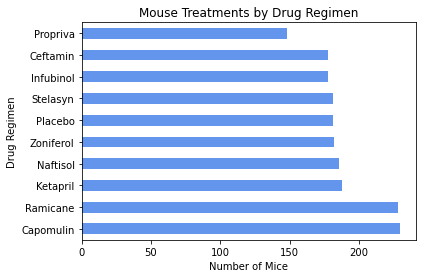

In [76]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# calculate results to use in bar chart
counts = clean_mouse_df["Drug Regimen"].value_counts()

# Create bar chart, set title and formatting
ax = counts.plot.barh(x='Regimen', y='count', rot=0, legend=False, title="Mouse Treatments by Drug Regimen", color='cornflowerblue')

# Set axis labels
ax.set(xlabel="Number of Mice", ylabel="Drug Regimen")

# Save to Images folder
plt.savefig("Images/pandas_bar_chart.png")

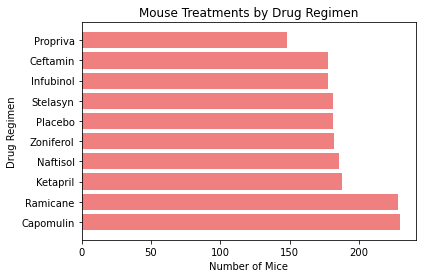

In [77]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Create bar chart
plt.barh(counts.index, counts.values, color='lightcoral', alpha=1, align="center")

# Set title and axis labels
plt.title("Mouse Treatments by Drug Regimen")
plt.xlabel("Number of Mice")
plt.ylabel("Drug Regimen")

# Save to Images folder
plt.savefig("Images/pyplot_bar_chart.png")

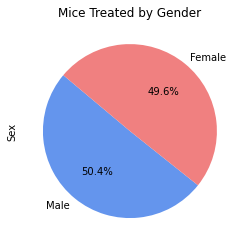

In [78]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Get first row of data for each mouse
mouse_gender_data = clean_mouse_df
mouse_gender_data = mouse_gender_data.drop_duplicates(subset="Mouse ID", keep='first')

# Calculate gender results
gender_count = mouse_gender_data["Sex"].value_counts()

# Create pie chart
gender_count.plot(kind='pie', colors = ['cornflowerblue', 'lightcoral'], 
                                title='Mice Treated by Gender',
                                startangle=140, autopct="%1.1f%%")

# Save to Images folder
plt.savefig("Images/pandas_pie_chart.png")

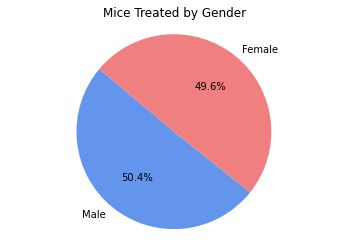

In [79]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create pie chart, add labels and formatting
plt.pie(gender_count, labels=["Male", "Female"], colors=['cornflowerblue', 'lightcoral'], autopct="%1.1f%%", startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Add title
plt.title("Mice Treated by Gender");

# Save to Images folder
plt.savefig("Images/pyplot_pie_chart.png")

## Quartiles, Outliers and Boxplots

In [80]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = pd.DataFrame(clean_mouse_df.groupby(["Mouse ID"])["Timepoint"].max())

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_timepoint_df = pd.merge(clean_mouse_df, last_timepoint_df, on=["Mouse ID", "Timepoint"],how="inner")


In [81]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

# Loop through to store tumor volume
for drug in treatment_list:
    vol = merged_timepoint_df.loc[merged_timepoint_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    tumor_volume_list.append(vol)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = vol.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq

    print(f"{drug}")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The IQR of {drug} is: {iqr}")
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print(f"\n")

Capomulin
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The IQR of Capomulin is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


Ramicane
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The IQR of Ramicane is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


Infubinol
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The IQR of Infubinol is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


Ceftamin
The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The IQR of Ceftamin is: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.




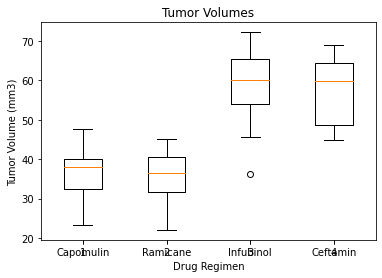

In [82]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Create subplot based on treatments in treatment list
treatment_list, ax1 = plt.subplots()

# Set plot and axis titles
ax1.set_title("Tumor Volumes")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")

# Add tick labels on x-axis
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

# Create boxplot showing tumor volumes for each treatment
ax1.boxplot(tumor_volume_list);

# Save to Images folder
plt.savefig("Images/box_plot.png")

## Line and Scatter Plots

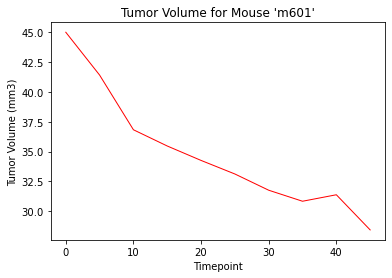

In [83]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Chose to analyze results for mouse "m601"
# Create df for mouse "m601".
m601_df = clean_mouse_df.loc[clean_mouse_df['Mouse ID'] == 'm601']

# Store values for x_axis and y_axis
x_axis = m601_df["Timepoint"]
y_axis = m601_df["Tumor Volume (mm3)"]

# Create line plot
plt.plot(x_axis, y_axis, color="red", linewidth=1)

# Set title and axis titles
plt.title("Tumor Volume for Mouse 'm601'")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

# Save to Images folder
plt.savefig("Images/line_plot.png")

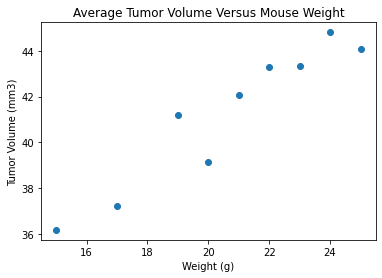

In [84]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Create df for mice treated by capomulin
capomulin_df = clean_mouse_df.set_index("Drug Regimen")
capomulin_df = capomulin_df.loc[["Capomulin"]]

# Group by weight and tumor volume. Aggregate mean
capomulin_df = capomulin_df.groupby(capomulin_df["Weight (g)"])["Tumor Volume (mm3)"].agg(['mean'])

# Store the plot data
plot_data = capomulin_df["mean"]

# Set x_values and y_values
x_values = plot_data.index
y_values = plot_data.values

# Plot the data
plt.scatter(x_values,y_values)

# Set title and axis titles
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Average Tumor Volume Versus Mouse Weight")

# Save to Images folder
plt.savefig("Images/scatter_plot.png");

## Correlation and Regression

The line_eq is: y = 0.89x + 22.76
The correlation coefficient between mouse weight and tumor volume is 0.95


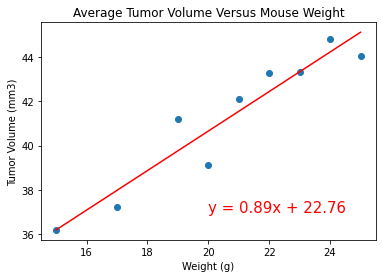

In [85]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Create df for mice treated by capomulin
capomulin_df = clean_mouse_df.set_index("Drug Regimen")
capomulin_df = capomulin_df.loc[["Capomulin"]]

# Group by weight and tumor volume. Aggregate mean
capomulin_df = capomulin_df.groupby(capomulin_df["Weight (g)"])["Tumor Volume (mm3)"].agg(['mean'])

# Store the plot data
plot_data = capomulin_df["mean"]

# Calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(plot_data.index,plot_data.values)

# Add the linear regression line to plot
plt.plot(x_values,regress_values,"r-")

# Add the linear regression equation to plot
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# Set title and axis titles
plt.title("Average Tumor Volume Versus Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

# Print the line equation value
print(f"The line_eq is: {line_eq}")

# Calculate and print the correlation coefficient
print(f"The correlation coefficient between mouse weight and tumor volume is {round(st.pearsonr(plot_data.index,plot_data.values)[0],2)}")

# Save to Images folder
plt.savefig("Images/correlation_coefficient_and_linear_regression.png");
